In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [45]:
data = pd.read_csv('weather_data.csv')
data["Date"] = pd.to_datetime(data["Date"])
data["Difference_in_days"] = (data["Date"] - data["Date"].min()).dt.days
data["Month"] = data["Date"].dt.month
mounthly_data = data.groupby("Month").mean().reset_index()

Задания 1.1 и 1.2:

Text(0.5, 1.0, 'Linear Regression (Humidity)')

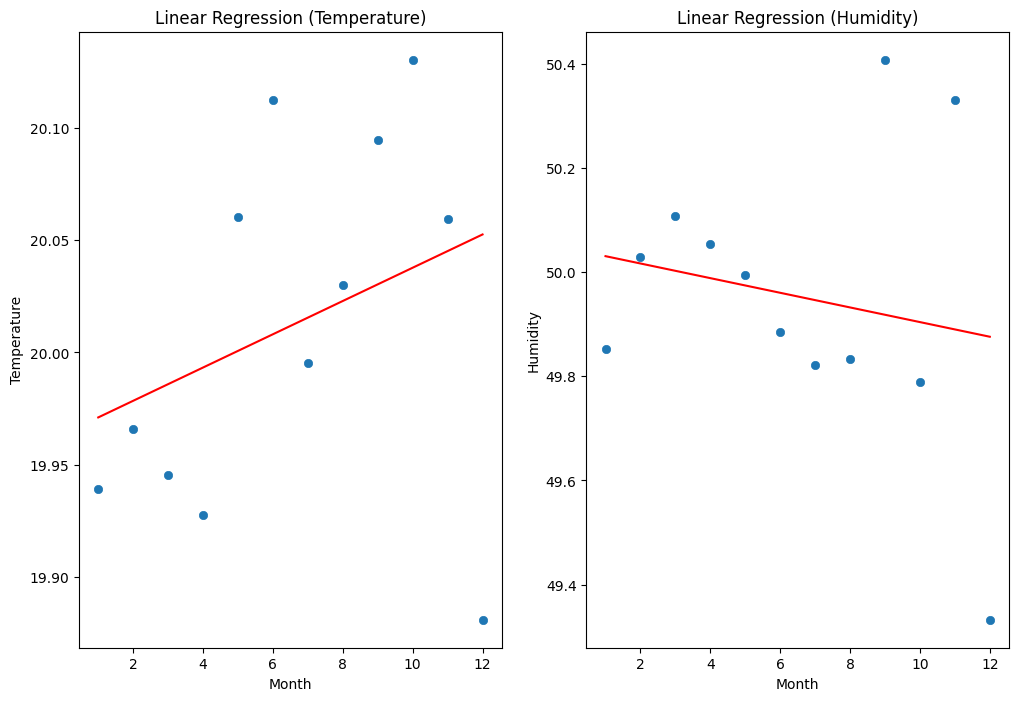

In [46]:
#X = data["Difference_in_days"].values.reshape(-1,1)
X = mounthly_data["Month"].values.reshape(-1, 1)
Y = mounthly_data["Temperature"].values
Z = mounthly_data["Humidity"].values

temp_model = LinearRegression()
humidity_model = LinearRegression()

temp_model.fit(X, Y)
humidity_model.fit(X, Z)

Y_pred = temp_model.predict(X)
Z_pred = humidity_model.predict(X)

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.scatter(X, Y, linewidths=0.5)
plt.plot(X, Y_pred, color='red')
#plt.xlabel('Difference in days')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Linear Regression (Temperature)')

plt.subplot(1, 2, 2)
plt.scatter(X, Z, linewidths=0.5)
plt.plot(X, Z_pred, color='red')
#plt.xlabel('Difference in days')
plt.xlabel('Month')
plt.ylabel('Humidity')
plt.title('Linear Regression (Humidity)')


Задание 1.3

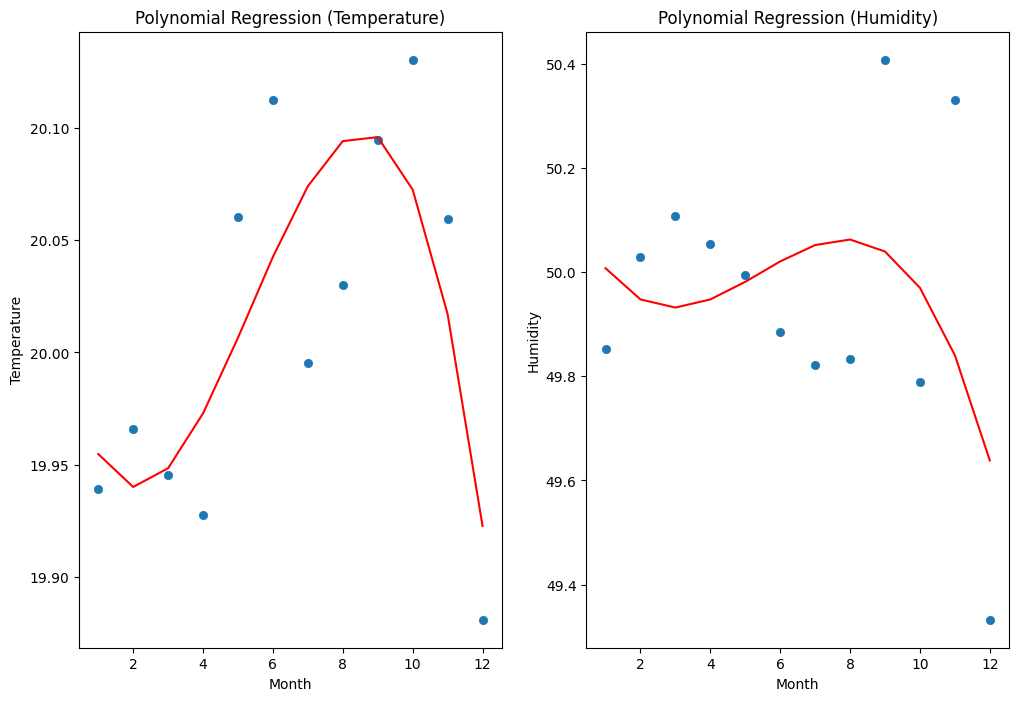

In [50]:
poly = PolynomialFeatures(degree=3)

X_poly = poly.fit_transform(X)

temp_model_poly = LinearRegression()
humidity_model_poly = LinearRegression()

temp_model_poly.fit(X_poly, Y)
humidity_model_poly.fit(X_poly, Z)

Y_pred_poly = temp_model_poly.predict(X_poly)
Z_pred_poly = humidity_model_poly.predict(X_poly)

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.scatter(X, Y, linewidths=0.5)
plt.plot(X, Y_pred_poly, color='red')
#plt.xlabel('Difference in days')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Polynomial Regression (Temperature)')
plt.subplot(1, 2, 2)
plt.scatter(X, Z, linewidths=0.5)
plt.plot(X, Z_pred_poly, color='red')
#plt.xlabel('Difference in days')
plt.xlabel('Month')
plt.ylabel('Humidity')
plt.title('Polynomial Regression (Humidity)')
plt.show()

Задание 1.4

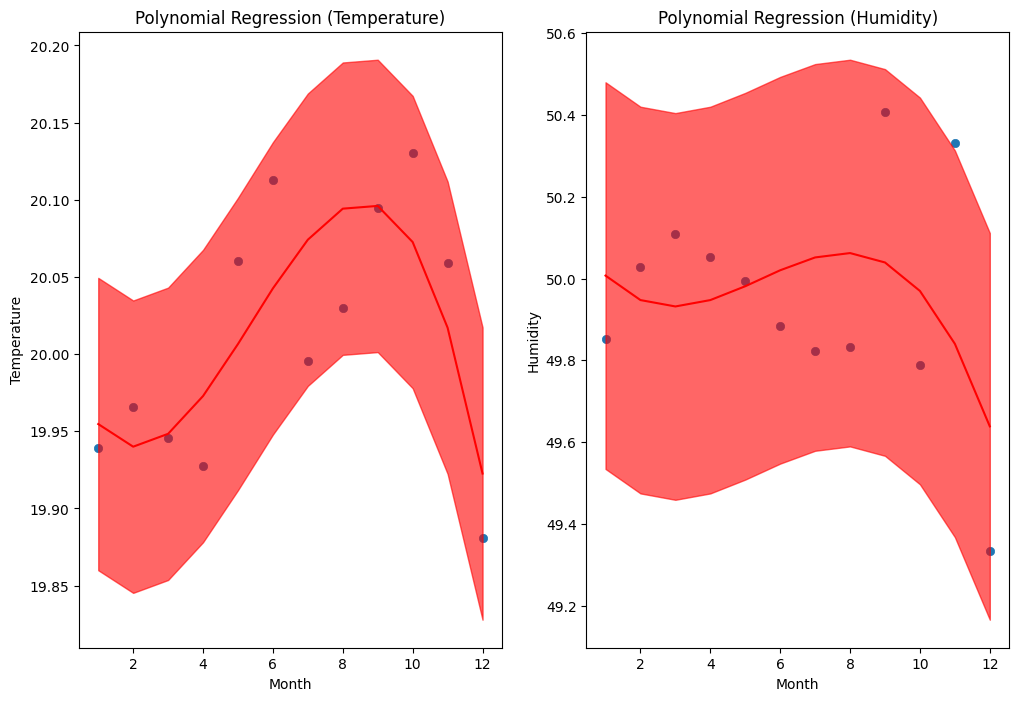

In [51]:
residualsY = Y - Y_pred_poly
residualsZ = Z - Z_pred_poly

stdY = np.std(residualsY)
stdZ = np.std(residualsZ)

lowerY, upperY = Y_pred_poly - stdY * 1.96, Y_pred_poly + stdY * 1.96
lowerZ, upperZ = Z_pred_poly - stdZ * 1.96, Z_pred_poly + stdZ * 1.96

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.scatter(X, Y, linewidths=0.5)
plt.fill_between(mounthly_data["Month"], lowerY, upperY, alpha=0.6, color='red')
plt.plot(X, Y_pred_poly, color='red')
#plt.xlabel('Difference in days')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Polynomial Regression (Temperature)')

plt.subplot(1, 2, 2)
plt.scatter(X, Z, linewidths=0.5)
plt.plot(X, Z_pred_poly, color='red')
plt.fill_between(mounthly_data["Month"], lowerZ, upperZ, alpha=0.6, color='red')
#plt.xlabel('Difference in days')
plt.xlabel('Month')
plt.ylabel('Humidity')
plt.title('Polynomial Regression (Humidity)')
plt.show()
